# Testing

This notebook can get you started to test the new `semantique` package!

## Prepare

We will construct all required components for query processing in advance, such that you only have to write the query recipe itself and execute it.

But of course, don't hesitate to create your own ontology instead, try different spatial or temporal extents, or even write your own factbase format..

You can find all documentation notebooks in the file browser in the menu on the left (if you are using Binder).

In [1]:
import semantique as sq

In [2]:
import geopandas as gpd
import json

In [3]:
# Ontology.
with open("files/ontology.json", "r") as file:
    ontology = sq.ontology.Semantique(json.load(file))

# Factbase.
with open("files/factbase.json", "r") as file:
    factbase = sq.factbase.GeotiffArchive(json.load(file), src = "files/resources.zip")

# Extent.
space = sq.SpatialExtent(gpd.read_file("files/footprint.geojson"))
time = sq.TemporalExtent("2019-01-01", "2020-12-31")

# Additional configuration.
config = {"output_crs": 3035, "output_tz": "UTC", "spatial_resolution": [-10, 10]}

Some notes:

- The demo factbase contains only a limited set of resources, which are the red, green, blue and nir bands from Sentinel 2 and the semantic enrichment layers color type (i.e. siam), greenness and brightness.
- The demo factbase only has a limited spatial extent, equal to [footprint.geojson](https://github.com/ZGIS/semantique/blob/main/demo/files/footprint.geojson).
- The demo factbase only has a limited amount of timestamps: 2019-12-15, 2020-09-05 and 2020-12-19,
- The ontology contains rulesets for five entities: water, vegetation, builtup, cloud and snow.

## A small example

As a small example we will create a query recipe with a single result: the infamous water count map!

In [4]:
recipe = sq.QueryRecipe()

In [5]:
recipe["water_count_map"] = sq.entity("water").reduce("time", "count")

In [6]:
response = recipe.execute(factbase, ontology, space, time, **config)

In [7]:
response["water_count_map"]

<xarray.DataArray 'water_count_map' (y: 563, x: 576)>
array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
    spatial_ref   int64 0
    temporal_ref  int64 0
    feature       (y, x) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
  * y             (y) float64 2.697e+06 2.697e+06 ... 2.691e+06 2.691e+06
  * x             (x) float64 4.53e+06 4.53e+06 4.53e+06 ... 4.536e+06 4.536e+06
Attributes:
    value_type:  numerical

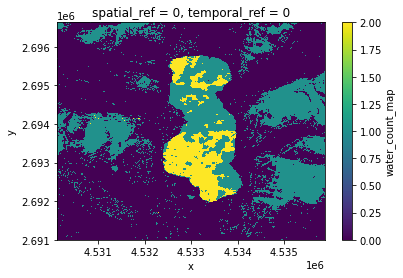

In [8]:
response["water_count_map"].plot()

## Your turn!

Happy coding :)